In [1]:
import sys, os
from os.path import abspath, sep, pardir
sys.path.append(abspath('') + sep + pardir)
#create basepath based on folder containing 'DataF2181', 'Analysis', and others
#basepath=abspath('') + sep + pardir


import numpy as np
import matplotlib.pyplot as plt
from Tools.plotting_params import *
from Tools.loading_funcs import basepath,load_grating_evoked_data
#from Tools.plotting_functions import 

In [2]:
from Tools.opm_functions import opm_from_tuning, opm_to_rgb
import matplotlib.transforms as transforms

def clip_std(frame, sigma=3):
    f_mean=np.nanmean(frame)
    f_std=np.nanstd(frame)
    f_white = (frame-f_mean)/f_std
    return np.clip(f_white, a_min=-sigma, a_max=sigma)

tr = transforms.Affine2D().rotate_deg_around(68,80,71)

In [3]:
grating_data_binoc=load_grating_evoked_data(key='binocular',
                            all_dates=['-2','+0','+2','+4','+6'],
                            basepath='..',
                            animal='2181')

In [4]:
all_grating_days = [*grating_data_binoc]
roi=np.asarray(~np.isnan(grating_data_binoc[all_grating_days[0]]['1s'][0,0]), dtype='bool')

Idate=all_grating_days[0]
Jdate=all_grating_days[-1]

grating_data_Iday = np.copy(grating_data_binoc[Idate]['0.5s'][:,:, roi])    
grating_data_Jday = np.copy(grating_data_binoc[Jdate]['0.5s'][:,:, roi]) 


## Figure i

In [5]:
#98th activity percentile of unfiltered data
#used as approximation for equal signal strength across two days 
#for visualization only
signal_Imax, signal_Jmax = 1.3, 0.97

grating_data_Iday = np.copy(grating_data_binoc[Idate]['0.5s'][:,:, roi])    
tuning = np.nanmean(grating_data_Iday, axis=0)
OPM_I = opm_from_tuning(tuning, normkey=False)*signal_Jmax/signal_Imax

grating_data_Jday = np.copy(grating_data_binoc[Jdate]['0.5s'][:,:, roi]) 
tuning = np.nanmean(grating_data_Jday, axis=0)
OPM_J = opm_from_tuning(tuning, normkey=False)*signal_Imax/signal_Jmax

clip=max(np.max(np.abs(OPM_I)), np.max(np.abs(OPM_J)))

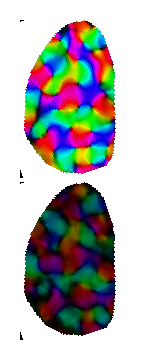

In [6]:

fig, axs=plt.subplots(nrows=2, ncols=1, figsize=cm2inch(1.4, 4.2))
plt.subplots_adjust(hspace=0, wspace=0, top=0.99, bottom=0.01, left=0.01, right=0.99)
#iday

#OPm
ax=axs[0]
frame=np.zeros_like(roi, dtype='complex')
frame[roi]=OPM_J
frame_hsv = opm_to_rgb(frame, clip=clip) 
roi3d = np.tile(roi[:,:,None], (1,1,3))
frame_hsv[~roi3d]=1.
ax.imshow(frame_hsv,
           transform=tr + ax.transData, interpolation='none',
         alpha=1)


ax=axs[1]
frame=np.zeros_like(roi, dtype='complex')
frame[roi]=OPM_I
frame_hsv = opm_to_rgb(frame, clip=clip) 
roi3d = np.tile(roi[:,:,None], (1,1,3))
frame_hsv[~roi3d]=1.
ax.imshow(frame_hsv,
           transform=tr + ax.transData,
         interpolation='none')

for ax in axs.flatten():
    ax.axis("off");
    ax.axis([25,100,130,20])

plt.show()
fig.savefig("Fig1i_opm.pdf", dpi=500)

